<a href="https://colab.research.google.com/github/KieuSonTung/Data_Preparation/blob/main/Data_Preparation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
plt.style.use('seaborn')

## Load the dateset

In [47]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/car train.csv', sep=';')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/car test.csv', sep=';')
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


## Overview

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


Now we are dropping those null rows

In [49]:
train = train.dropna()
train = train.reset_index(drop=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   object 
 9   engine         5840 non-null   object 
 10  max_power      5840 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5840 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 593.2+ KB


We are modifying some fields 

## Fuel


In [51]:
train['fuel'].value_counts()

Diesel    3192
Petrol    2582
CNG         41
LPG         25
Name: fuel, dtype: int64

In [52]:
train = train[~train.fuel.str.contains('CNG')]
train = train[~train.fuel.str.contains('LPG')]
train.fuel.value_counts()

Diesel    3192
Petrol    2582
Name: fuel, dtype: int64

In [53]:
Fuel = train[['fuel']]
Fuel = pd.get_dummies(Fuel, drop_first=True)
Fuel.head()

,fuel_Petrol
0,0
1,0
2,0
3,1
4,0


In [54]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


## Brand

In [55]:
train['brand'] = train['name'].apply(lambda x: x.split()[0])
train.brand.value_counts()

Maruti           1683
Hyundai           982
Mahindra          585
Tata              535
Toyota            339
Honda             334
Ford              281
Chevrolet         169
Renault           164
Volkswagen        135
BMW                82
Skoda              76
Nissan             60
Jaguar             52
Volvo              50
Datsun             49
Mercedes-Benz      44
Fiat               34
Audi               30
Lexus              27
Jeep               23
Mitsubishi         12
Land                6
Isuzu               5
Force               5
Kia                 4
Ambassador          3
Daewoo              2
Opel                1
MG                  1
Ashok               1
Name: brand, dtype: int64

In [56]:
asia_car = ['Maruti', 'Hyundai', 'Toyota', 'Tata', 'Honda', 'Nissan', 'Datsun', 
            'Mitsubishi', 'Isuzu', 'Kia', 'Daewoo']
train['brand'] = train['name'].apply(lambda x: 'Asia' if x.split()[0] in asia_car else 'Euro')
'''
1: Asia brand
2: Euro brand
'''
train.brand.value_counts()

Asia    4005
Euro    1769
Name: brand, dtype: int64

In [57]:
Brand = train[['brand']]
Brand = pd.get_dummies(Brand, drop_first=True)
Brand.head()

,brand_Euro
0,0
1,0
2,0
3,0
4,1


## Torque

In [58]:
a = np.array(train['torque'].apply(lambda x: x.split()[0]))
for i in a[:5]:
    print(i)


260Nm@
219.66nm@
360Nm@
154.9Nm@
400Nm


Since there are a lot of variations and some observations don't have measuring unit so we are going to drop **torque** column

In [59]:
train.drop(columns='torque', inplace=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,5.0,Asia
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,5.0,Asia
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,7.0,Asia
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,5.0,Asia
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,5.0,Euro


## Year

In [60]:
train['year'].value_counts().sort_index()

1994      1
1995      1
1996      2
1997      8
1998      6
1999      8
2000     10
2001      5
2002     17
2003     28
2004     39
2005     56
2006     71
2007    121
2008    147
2009    156
2010    268
2011    424
2012    450
2013    489
2014    466
2015    569
2016    623
2017    740
2018    604
2019    419
2020     46
Name: year, dtype: int64

In [61]:
train['class_year'] = train['year'].apply(lambda x: 'before_2015' if x <= 2015 else 'after_2015')
train['class_year'].value_counts()

before_2015    3342
after_2015     2432
Name: class_year, dtype: int64

In [62]:
Year = train[['class_year']]
Year = pd.get_dummies(Year, drop_first=True)
Year.head()

,class_year_before_2015
0,0
1,0
2,1
3,1
4,0


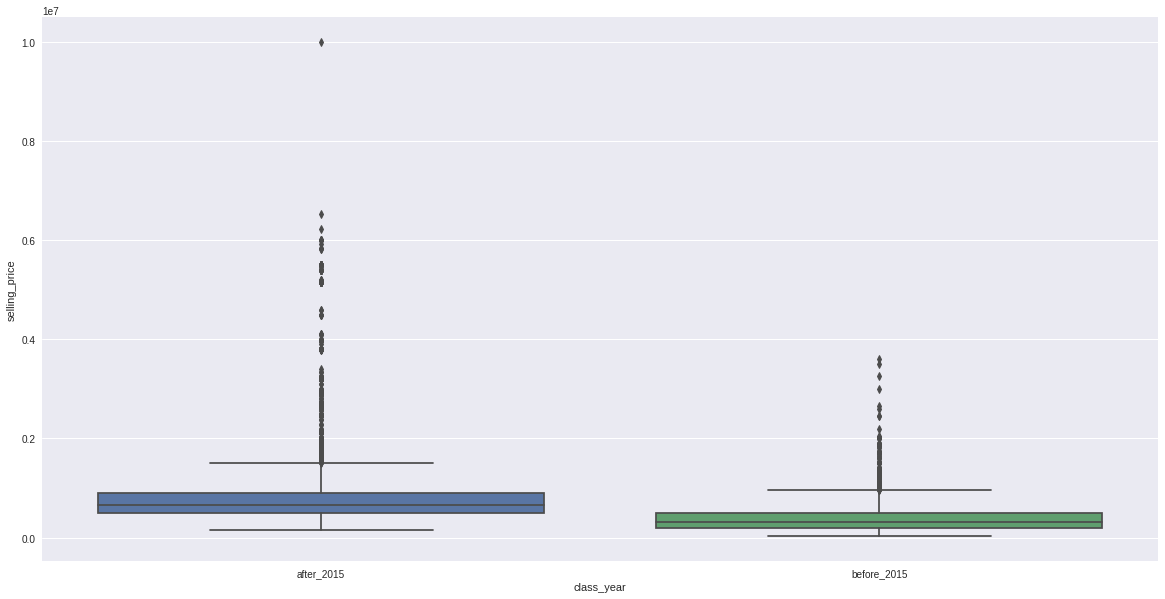

In [63]:
# Year/ Price

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x='class_year', y='selling_price', data=train)
locs, labels = plt.xticks()
plt.show()

## Seller Type

In [64]:
train.seller_type.value_counts()

Individual          4794
Dealer               806
Trustmark Dealer     174
Name: seller_type, dtype: int64

In [65]:
train['seller_type'].replace({'Trustmark Dealer': 'Dealer'}, inplace=True)

In [66]:
Seller = train[['seller_type']]
Seller = pd.get_dummies(Seller, drop_first=True)
Seller.head()

,seller_type_Individual
0,1
1,1
2,1
3,1
4,1


## Owner

In [67]:
train['owner'].value_counts()

First Owner             3812
Second Owner            1474
Third Owner              371
Fourth & Above Owner     112
Test Drive Car             5
Name: owner, dtype: int64

In [68]:
train['owner'].replace(['Fourth & Above Owner', 'Test Drive Car', 'Third Owner'], 'Others', inplace=True)

In [69]:
train['owner'].value_counts()

First Owner     3812
Second Owner    1474
Others           488
Name: owner, dtype: int64

In [70]:
Owner = train[['owner']]
Owner = pd.get_dummies(Owner, drop_first=True)
Owner.head()

,owner_Others,owner_Second Owner
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


## Mileage

In [71]:
train['mileage'].apply(lambda x: x.split()[1]).value_counts()

kmpl    5774
Name: mileage, dtype: int64

We can see that some observations have different measuring units, so we have to convert them 

In [72]:
train['mileage'] = train['mileage'].apply(lambda x: float(x.split()[0]) if str(x).endswith('kmpl') else float(x.split()[0]) * 1.4) 
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,class_year
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497 CC,108.5 bhp,5.0,Asia,after_2015
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396 CC,88.76 bhp,5.0,Asia,after_2015
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982 CC,168.5 bhp,7.0,Asia,before_2015
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591 CC,121.3 bhp,5.0,Asia,before_2015
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969 CC,190 bhp,5.0,Euro,after_2015


## Transmission

In [73]:
train.transmission.value_counts()

Manual       5006
Automatic     768
Name: transmission, dtype: int64

In [74]:
Trans = train[['transmission']]
Trans = pd.get_dummies(Trans, drop_first=True)
Trans.head()

,transmission_Manual
0,1
1,1
2,0
3,1
4,0


## Engine

In [75]:
train['engine'].apply(lambda x: x.split()[1]).value_counts()

CC    5774
Name: engine, dtype: int64

In [76]:
train['engine'] = train['engine'].apply(lambda x: float(x.split()[0]))
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,class_year
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.5 bhp,5.0,Asia,after_2015
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.76 bhp,5.0,Asia,after_2015
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.5 bhp,7.0,Asia,before_2015
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591.0,121.3 bhp,5.0,Asia,before_2015
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190 bhp,5.0,Euro,after_2015


## Max Power

In [77]:
train['max_power'].apply(lambda x: x.split()[1]).value_counts()

bhp    5774
Name: max_power, dtype: int64

In [78]:
train['max_power'] = train['max_power'].apply(lambda x: float(x.split()[0]))
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,class_year
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0,Asia,after_2015
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.76,5.0,Asia,after_2015
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.50,7.0,Asia,before_2015
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591.0,121.30,5.0,Asia,before_2015
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0,Euro,after_2015


## Final Dataset


In [79]:
train.drop(columns={'name', 'year', 'fuel', 'seller_type', 'transmission', 'owner', 'brand', 'class_year'}, inplace=True)
train.head()

,selling_price,km_driven,mileage,engine,max_power,seats
0,850000,9500,21.50,1497.0,108.50,5.0
1,750000,30000,21.19,1396.0,88.76,5.0
2,1500000,80000,12.55,2982.0,168.50,7.0
3,795000,35000,17.01,1591.0,121.30,5.0
4,3800000,20000,18.00,1969.0,190.00,5.0


In [80]:
ftrain = pd.concat([train, Brand, Year, Fuel, Seller, Owner], axis=1)
ftrain.head()

,selling_price,km_driven,mileage,engine,max_power,seats,brand_Euro,class_year_before_2015,fuel_Petrol,seller_type_Individual,owner_Others,owner_Second Owner
0,850000,9500,21.50,1497.0,108.50,5.0,0,0,0,1,0,0
1,750000,30000,21.19,1396.0,88.76,5.0,0,0,0,1,0,0
2,1500000,80000,12.55,2982.0,168.50,7.0,0,1,0,1,0,1
3,795000,35000,17.01,1591.0,121.30,5.0,0,1,1,1,0,0
4,3800000,20000,18.00,1969.0,190.00,5.0,1,0,0,1,0,0


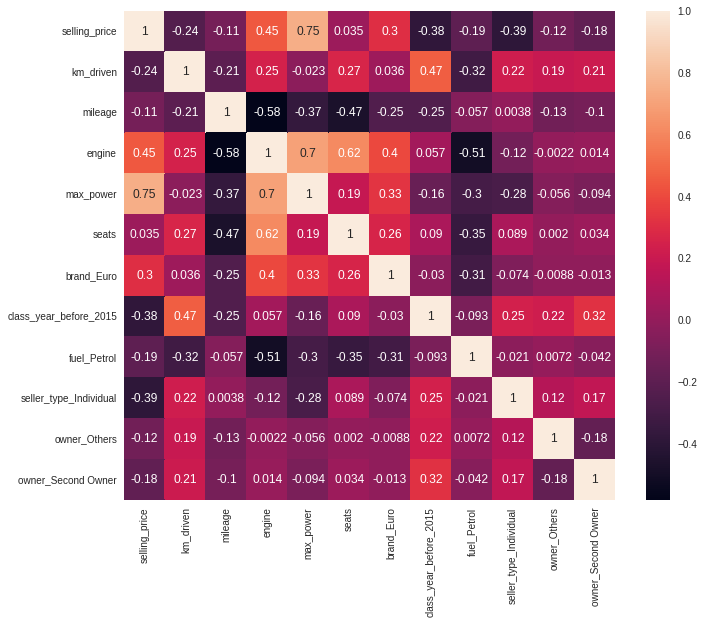

In [81]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(ftrain.corr(), annot=True)

# Build Model

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [83]:
X = ftrain.drop(columns='selling_price')
y = ftrain['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [84]:
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5774 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   selling_price           5774 non-null   int64  
 1   km_driven               5774 non-null   int64  
 2   mileage                 5774 non-null   float64
 3   engine                  5774 non-null   float64
 4   max_power               5774 non-null   float64
 5   seats                   5774 non-null   float64
 6   brand_Euro              5774 non-null   uint8  
 7   class_year_before_2015  5774 non-null   uint8  
 8   fuel_Petrol             5774 non-null   uint8  
 9   seller_type_Individual  5774 non-null   uint8  
 10  owner_Others            5774 non-null   uint8  
 11  owner_Second Owner      5774 non-null   uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 509.6 KB


In [102]:
# SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

regr = make_pipeline(StandardScaler(), SVR(C=9000000))
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('MSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)))
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)))
print('R-squared:', str(regr.score(X_test, y_test)))


MSE: 47445476636.528244
RMSE: 217819.82608690203
R-squared: 0.9325820309942165


# Test model on the test set